In [78]:
#importera paket
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
import seaborn as sns 

from scipy.stats import t
from scipy.stats import norm
from statsmodels.formula.api import ols


# import cars data
filepath = '../Uppgift/Data/auto-mpg.csv'
cars = pd.read_csv(filepath)
cars = cars.dropna() # Remove rows containing NaN
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


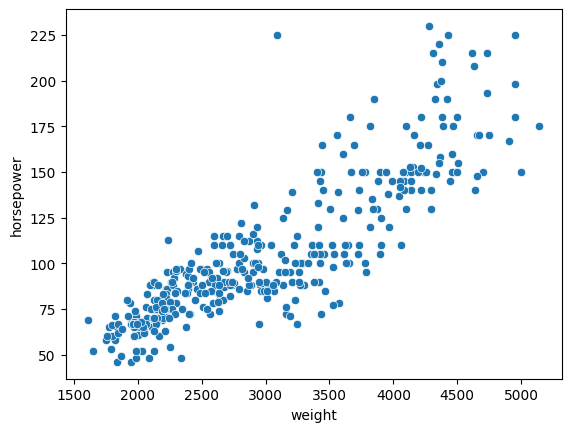

In [79]:
# scatter plot of horsepower versus weight
sns.scatterplot(data=cars,x='weight', y='horsepower')
plt.show()

### Do regression with state models OLS (Ordinary Least Squares)

Ordinary least squares (OLS) regression is a method that allow us to find a line that  describes the relationship between 1 or more predictor variables and a response variable.

In [80]:
model = ols('mpg ~ origin', data=cars).fit() # Fit the linear regression model
print(model.summary()) # print the summary of the model

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     96.60
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           8.67e-35
Time:                        10:30:05   Log-Likelihood:                -1282.2
No. Observations:                 392   AIC:                             2570.
Df Residuals:                     389   BIC:                             2582.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          27.6029      0.776     

In [81]:
sample=scs.pearsonr(cars['horsepower'], cars['weight']) # correlation with spicy
print(sample)

PearsonRResult(statistic=0.8645377375741445, pvalue=1.3643468773730233e-118)


In [82]:
sample.confidence_interval() #  confidence interval range 

ConfidenceInterval(low=0.8371778068279874, high=0.8875815463847679)

In [83]:
ypred = model.predict(cars['weight']) # in sample predection
scatterplot = sns.scatterplot(data=cars,x='weight', y='horsepower')
scatterplot.plot([cars['weight'].min(), cars['weight'].max()],
                  [ypred.min(), ypred.max()],
                  "r", label="OLS prediction")
scatterplot.legend(loc="best")
plt.show()

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'origin' is not defined
    mpg ~ origin
          ^^^^^^

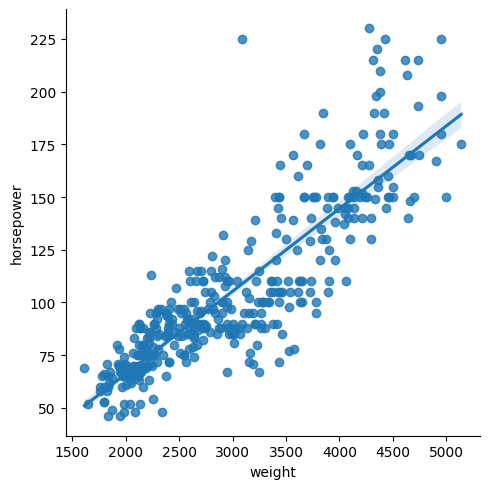

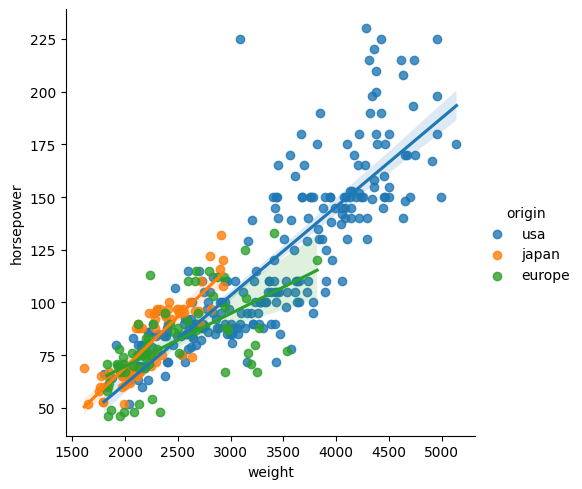

In [ ]:
# Show the results of a linear regression

sns.lmplot(data=cars,x='weight', y='horsepower')
sns.lmplot(data=cars,x='weight', y='horsepower', hue='origin')


0    222.878630
1    340.409687
2    967.241993
dtype: float64


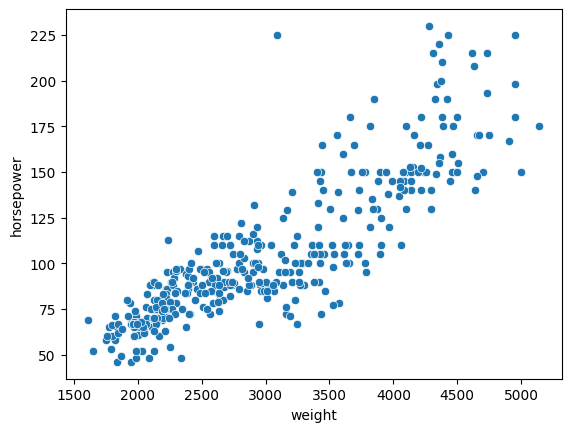

In [ ]:
# out of sample prediction
scatterplot = sns.scatterplot(data=cars, x='weight', y='horsepower')

predictions = pd.DataFrame([6000,9000,25000], columns=['weight'])
ypred = model.predict(predictions)
print(ypred)

In [ ]:
cars = cars.sample(30) # take some sample
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
138,14.0,8,318.0,150.0,4457,13.5,74,usa,dodge coronet custom (sw)
208,13.0,8,318.0,150.0,3940,13.2,76,usa,plymouth volare premier v8
109,21.0,4,140.0,72.0,2401,19.5,73,usa,chevrolet vega
256,20.5,6,225.0,100.0,3430,17.2,78,usa,plymouth volare
122,24.0,4,121.0,110.0,2660,14.0,73,europe,saab 99le


In [ ]:
model = ols('horsepower ~ weight', data=cars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     122.4
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           9.92e-12
Time:                        10:04:08   Log-Likelihood:                -132.39
No. Observations:                  30   AIC:                             268.8
Df Residuals:                      28   BIC:                             271.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.6153     14.307     -2.559      0.0

In [ ]:
sample=scs.pearsonr(cars['horsepower'], cars['weight']) # correlation with spicy
print(sample)

PearsonRResult(statistic=0.8645377375741445, pvalue=1.3643468773730233e-118)


In [ ]:
sample.confidence_interval() #  confidence interval range 

ConfidenceInterval(low=0.8371778068279874, high=0.8875815463847679)

### Prediction interval in sample prediction

In [ ]:
predictions = model.get_prediction(cars['weight'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,124.799701,213.081037
1,101.721661,188.471259
2,30.384249,117.852091
3,78.523557,164.627222
4,42.667224,129.459145
5,96.347764,182.868657
6,1.227537,91.111671
7,113.783329,201.222016
8,70.000076,156.086396
9,64.254584,150.394192


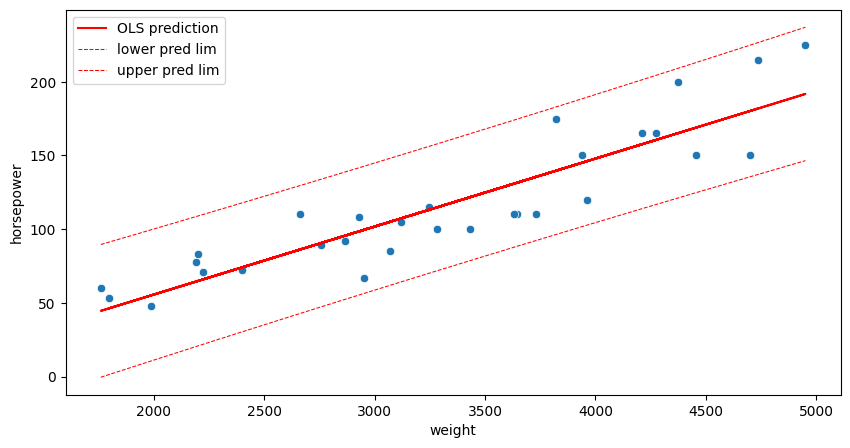

In [ ]:
order = np.argsort(cars['weight'])
xs = np.array(cars['weight'])[order]
# ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=cars, x='weight', y='horsepower')
ax.plot(cars['weight'], ypred, "r", label="OLS prediction")

order = np.argsort(cars['weight'])
x = np.array(cars['weight'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

### Prediction interval out of sample prediction

           weight
0        0.000000
1      151.057402
2      302.114804
3      453.172205
4      604.229607
..            ...
327  49395.770393
328  49546.827795
329  49697.885196
330  49848.942598
331  50000.000000

[332 rows x 1 columns]


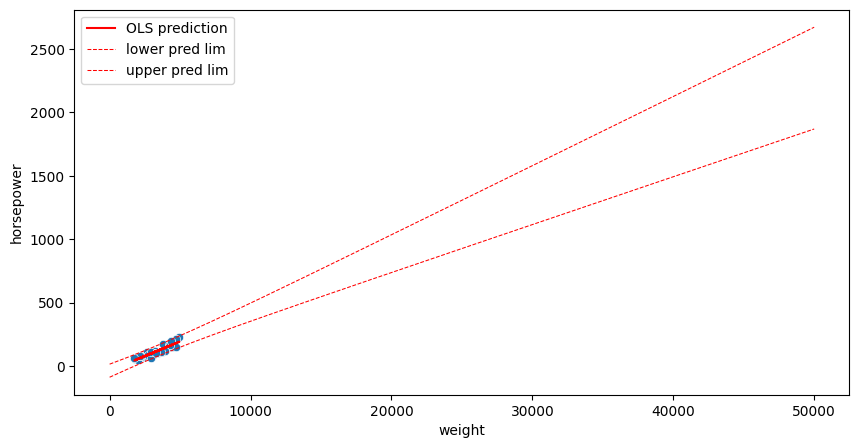

In [ ]:
xs = pd.DataFrame(np.linspace(0,50000,332), columns=['weight'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=cars, x='weight', y='horsepower')
ax.plot(cars['weight'], ypred, "r", label="OLS prediction")

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()